In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

from scipy.io  import loadmat
aa = loadmat('/content/Hmatrix.mat')
result = aa.items()
data = list(result)
H = np.array(data[3][1])

def bec(aa,p):                    # channel that introduces errors in message
  a = np.copy(aa)
  l = len(a)
  n=int(round(p*l,0))
  s = random.sample(range(0,l),n)
  for i in range(0,n):
    a[s[i]] = -1
  return a

dc = dv = 0                      # dc represents degree of check nodes and 
                                 # dv represents degree of variable node

for a in H[0]:
  if a==1:
    dc = dc + 1

for na in H[:,0]:
  if na==1:
    dv = dv + 1

print(dc,dv)

row = H.shape[0]                 # calculating rows   
print(row)                     
col = H.shape[1]                 # calculating columns
print(col)


xpoints=np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ypoints=np.array([0.0]*11)

ch = np.array([[-1 for i in range(dc)] for j in range(row)])    # represents connection of check nodes
var = np.array([[-1 for i in range(dv)] for j in range(col)])   # represents connection of variable nodes

for i in range(0,row):
  k = 0
  for j in range(0,col):
    if H[i][j] == 1:
      ch[i][k] = j;
      k = k+1
      for m in range(dv):
        if var[j][m] == -1:
          var[j][m] = i
          break

print('ch = ',ch)
print('var = ',var)



4 3
3792
5056
ch =  [[  57  100  206  260]
 [  58  101  207  261]
 [  59  102  208  262]
 ...
 [1244 2464 3769 5046]
 [1245 2465 3770 5047]
 [1246 2466 3771 5048]]
var =  [[  22 1274 2566]
 [  23 1275 2567]
 [  24 1276 2568]
 ...
 [1191 2459 3717]
 [1192 2460 3718]
 [1193 2461 3719]]


0
Success Rate is
1.0
0.1
Success Rate is
1.0
0.2
Success Rate is
1.0
0.30000000000000004
Success Rate is
1.0
0.4
Success Rate is
1.0
0.5
Success Rate is
1.0
0.6
Success Rate is
1.0
0.7
Success Rate is
0.0
0.7999999999999999
Success Rate is
0.0
0.8999999999999999
Success Rate is
0.0
0.9999999999999999
Success Rate is
0.0


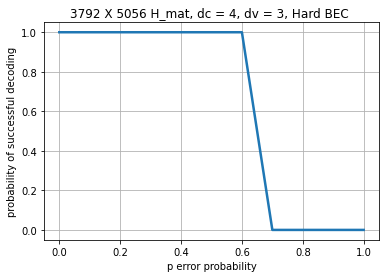

In [ ]:
result=0
prob=0
s=0

Nsim = 10
while(prob<=1):
    print(prob)
    for q in range(0,Nsim):

      input_msg = np.zeros(col)
      received_msg=bec(input_msg,prob)
      ans_msg = np.copy(received_msg)

      it = 0                        # iterator index
      VNs = np.copy(ans_msg[ch])    # creating subarray of variable nodes connected to check nodes
      
      while np.count_nonzero(ans_msg == -1) and it<15:   

        it = it + 1

        for ii in range(row): 

          if(np.count_nonzero(VNs[ii] == -1) == 1):  #if there is only one error in subarray it will update the value of erasure by doing XOR operation on other VNs
     
            ctr=0
            p=0

            for l in range(dc):
              if(VNs[ii][l]!=-1):
                ctr+=VNs[ii][l]
              else:
                p=l
            
            VNs[ii][p] = ctr%2

        Vs = np.copy(var)                # Storing data at variable nodes computed by check nodes
        for i in range(0,col):
          for j in range(0,dv):
            ii = var[i][j]
            for k in range(0,dc):
              if ch[ii][k] == i:
                break
            Vs[i][j] = VNs[ii][k]

        for i in range(0,col):          # Determining answer bit
          flag = 1
          if received_msg[i] == -1:
            for j in range(0,dv):
              if Vs[i][j] != -1:
                flag = 0
                ans_msg[i] = Vs[i,j]
                break
            if flag:
              ans_msg[i] = -1

        Vc = np.copy(var)             # Calulating bits to send CNs for next iteration
        for i in range(0,col):
          for j in range(0,dv):
            flag = 1
            for k in range(0,dv):
              if var[i][k]==var[i][j]:
                continue
              if Vs[i][k] != -1:
                flag = 0
                Vc[i][j] = Vs[i][k]
                break
            if flag:
              Vc[i][j] = -1

        for i in range(0,row):     # Passing Calculated bits to CNs back
         for j in range(0,dc):
           ii = ch[i][j]
           for k in range(0,dv):
             if var[ii][k] == i:
               break
           VNs[i][j] = Vc[ii][k]       
 
      count= np.count_nonzero(ans_msg == -1)      # Determining Result
      if count==0:
        result=result+1               # Calculating Success Rate
    print("Success Rate is")       
    print(result/Nsim)
    ypoints[s]=(float)(result/Nsim)
    s=s+1
    result=0
      
    prob=prob+0.1


plt.plot(xpoints,ypoints,linewidth = '2.5')                   # plotting the success graph

plt.title("3792 X 5056 H_mat, dc = 4, dv = 3, Hard BEC ")    
plt.xlabel("p error probability")
plt.ylabel("probability of successful decoding")
plt.grid()
plt.show()